## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## Load Dataset

In [2]:
file_path = r'E:\ML\global youtube statistics.csv'  
df = pd.read_csv(file_path, encoding='ISO-8859-1')


## Initial Inspection

In [3]:
print("Dataset Overview:")
print(df.head(), "\n")
print("Dataset Info:")
print(df.info(), "\n")
print("Data Types:")
print(df.dtypes, "\n")


Dataset Overview:
   rank                    Youtuber  subscribers   video views  \
0     1                    T-Series    245000000  2.280000e+11   
1     2              YouTube Movies    170000000  0.000000e+00   
2     3                     MrBeast    166000000  2.836884e+10   
3     4  Cocomelon - Nursery Rhymes    162000000  1.640000e+11   
4     5                   SET India    159000000  1.480000e+11   

           category                       Title  uploads        Country  \
0             Music                    T-Series    20082          India   
1  Film & Animation               youtubemovies        1  United States   
2     Entertainment                     MrBeast      741  United States   
3         Education  Cocomelon - Nursery Rhymes      966  United States   
4             Shows                   SET India   116536          India   

  Abbreviation   channel_type  Validity  
0           IN          Music         1  
1           US          Games         1  
2       

## Check Missing Values and Duplicates

In [4]:
print("Missing Values:")
print(df.isnull().sum(), "\n")
print(f"Number of duplicate rows: {df.duplicated().sum()}\n")


Missing Values:
rank             0
Youtuber         0
subscribers      0
video views      0
category        23
Title            0
uploads          0
Country         74
Abbreviation    74
channel_type    17
Validity         0
dtype: int64 

Number of duplicate rows: 0



## Descriptive Statistics

In [5]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
stats_summary = df.describe().T
stats_summary['range'] = stats_summary['max'] - stats_summary['min']
stats_summary['median'] = df[num_cols].median()  
stats_summary['mode'] = df[num_cols].mode().iloc[0]  
print(stats_summary, "\n")


             count          mean           std         min           25%  \
rank         500.0  2.505000e+02  1.444818e+02         1.0  1.257500e+02   
subscribers  500.0  3.132500e+07  2.166815e+07  17700000.0  2.047500e+07   
video views  500.0  1.577333e+10  1.830877e+10         0.0  6.602313e+09   
uploads      500.0  8.596802e+03  3.167721e+04         0.0  1.682500e+02   
Validity     500.0  4.000000e-01  4.903886e-01         0.0  0.000000e+00   

                      50%           75%           max         range  \
rank         2.505000e+02  3.752500e+02  5.000000e+02  4.990000e+02   
subscribers  2.455000e+07  3.350000e+07  2.450000e+08  2.273000e+08   
video views  1.147505e+10  1.943593e+10  2.280000e+11  2.280000e+11   
uploads      7.260000e+02  3.031000e+03  3.013080e+05  3.013080e+05   
Validity     0.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00   

                   median        mode  
rank         2.505000e+02         1.0  
subscribers  2.455000e+07  17900000.

## Histograms of Numerical Features

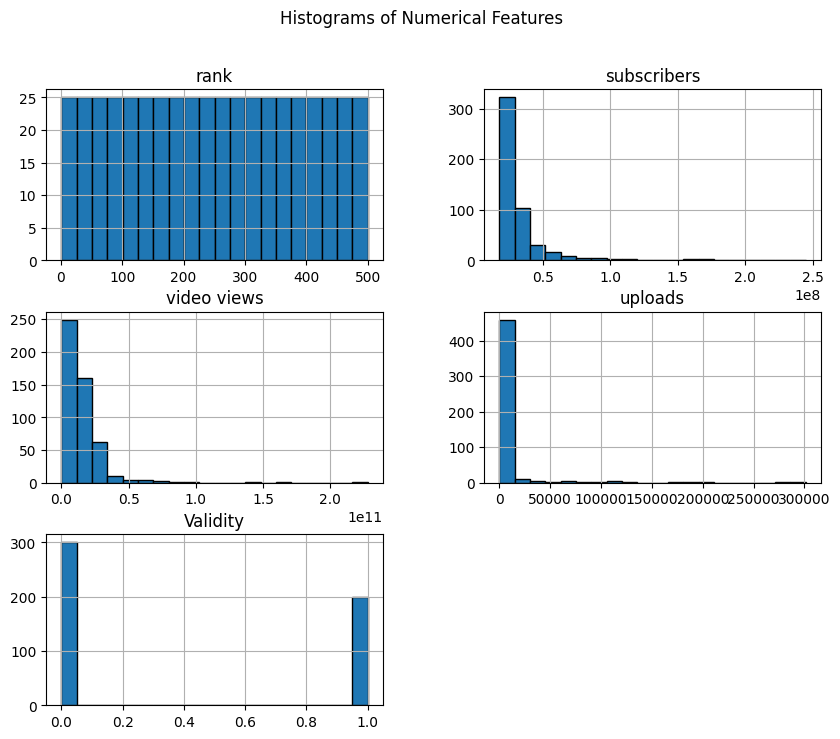

In [6]:
df[num_cols].hist(figsize=(10, 8), bins=20, edgecolor='black')
plt.suptitle("Histograms of Numerical Features")
plt.show()


## Skewness Detection

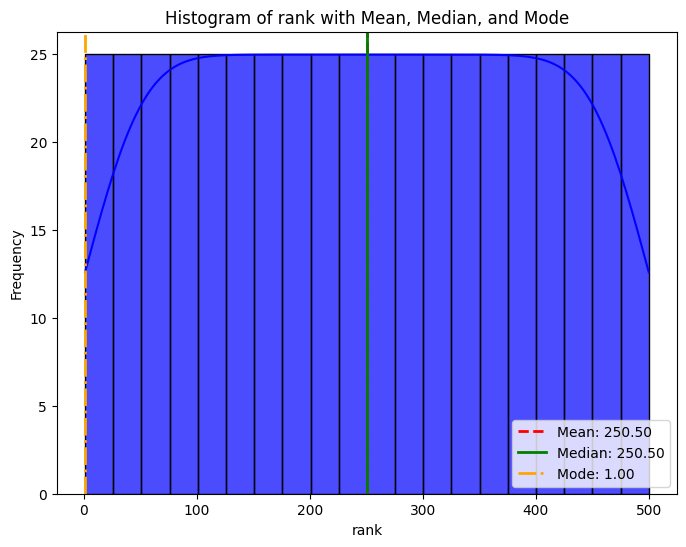

rank: Mean=250.50, Median=250.50, Mode=1.00 -> No Skew


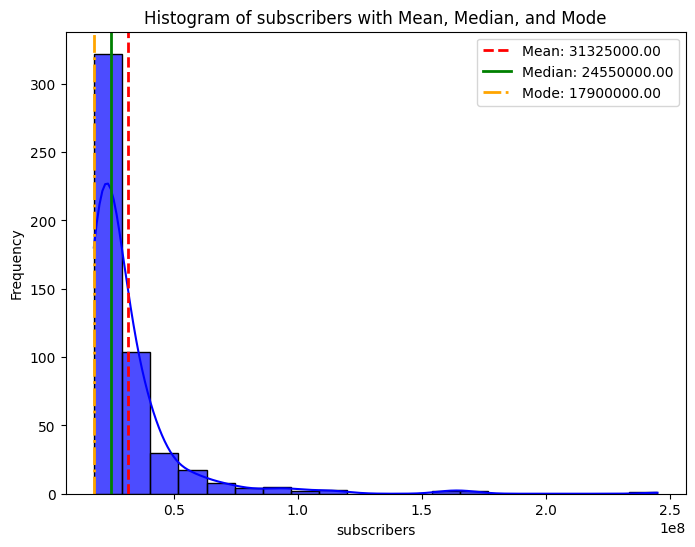

subscribers: Mean=31325000.00, Median=24550000.00, Mode=17900000.00 -> Positive Skew


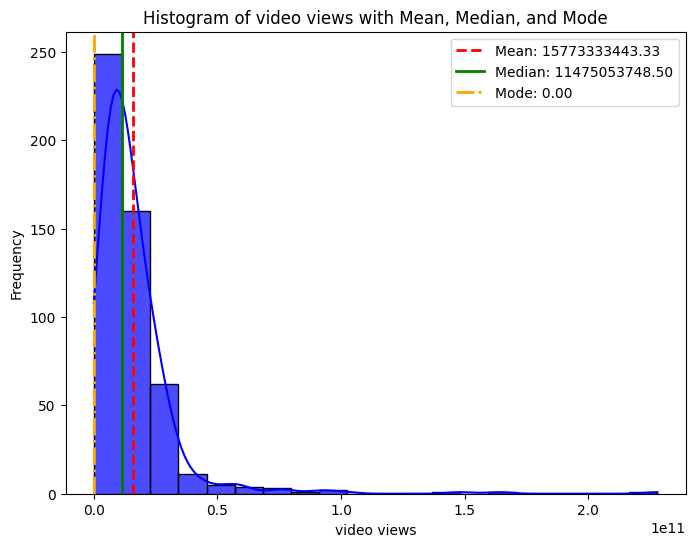

video views: Mean=15773333443.33, Median=11475053748.50, Mode=0.00 -> Positive Skew


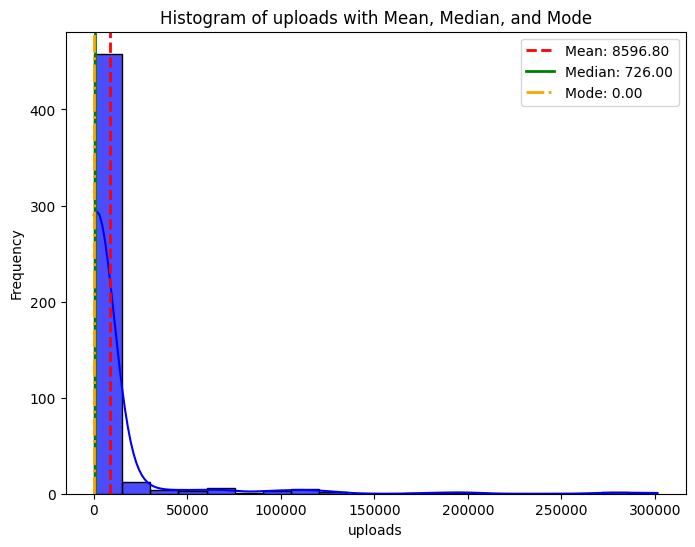

uploads: Mean=8596.80, Median=726.00, Mode=0.00 -> Positive Skew


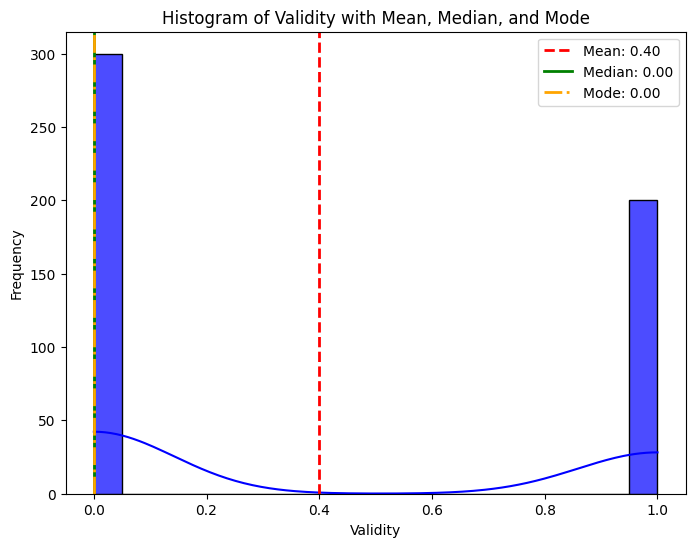

Validity: Mean=0.40, Median=0.00, Mode=0.00 -> Positive Skew


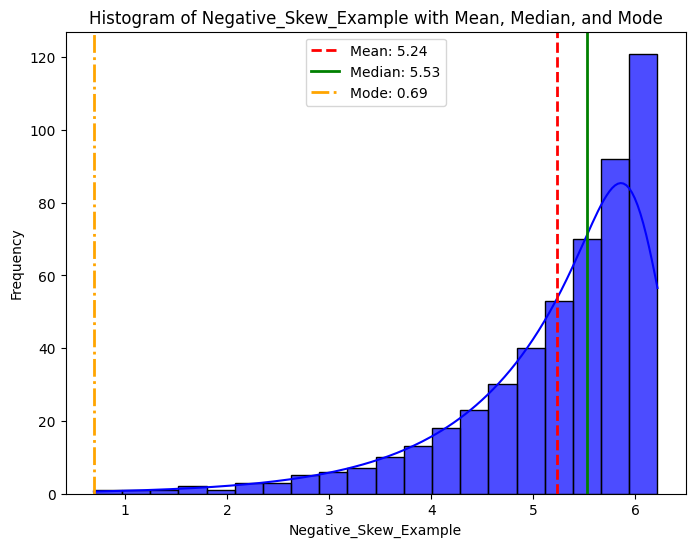

Negative_Skew_Example: Mean=5.24, Median=5.53, Mode=0.69 -> Negative Skew


In [7]:
if 'Negative_Skew_Example' not in df.columns:
    df['Negative_Skew_Example'] = np.log1p(df[num_cols[0]])  

columns_to_plot = list(num_cols)
if 'Negative_Skew_Example' in df.columns:
    columns_to_plot.append('Negative_Skew_Example')

for col in columns_to_plot:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[col], kde=True, bins=20, color="blue", edgecolor="black", alpha=0.7)
    
    mean = df[col].mean()
    median = df[col].median()
    mode = df[col].mode()[0]
    
    plt.axvline(mean, color='red', linestyle='--', linewidth=2, label=f"Mean: {mean:.2f}")
    plt.axvline(median, color='green', linestyle='-', linewidth=2, label=f"Median: {median:.2f}")
    plt.axvline(mode, color='orange', linestyle='-.', linewidth=2, label=f"Mode: {mode:.2f}")
    
    plt.title(f"Histogram of {col} with Mean, Median, and Mode")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.legend()
    plt.show()

    if mean > median:
        skewness_type = "Positive Skew"
    elif mean < median:
        skewness_type = "Negative Skew"
    else:
        skewness_type = "No Skew"

    print(f"{col}: Mean={mean:.2f}, Median={median:.2f}, Mode={mode:.2f} -> {skewness_type}")


## Box Plots

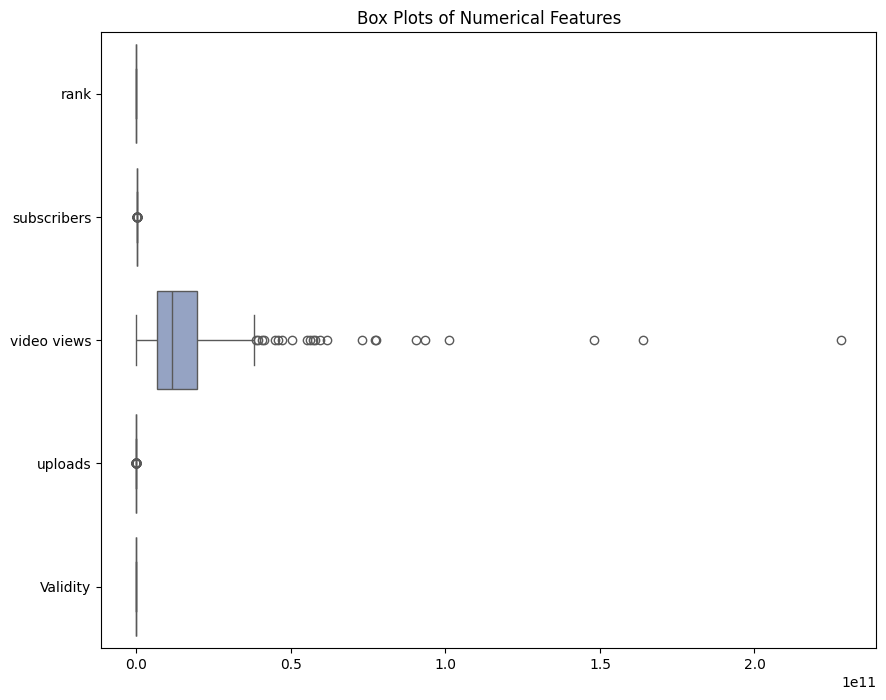

In [8]:
plt.figure(figsize=(10, 8))
sns.boxplot(data=df[num_cols], orient='h', palette='Set2')
plt.title("Box Plots of Numerical Features")
plt.show()


## Count Plot for Categories

C:\Users\HP\AppData\Local\Temp\ipykernel_4396\2429696558.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y='category', order=df['category'].value_counts().index, palette='viridis')


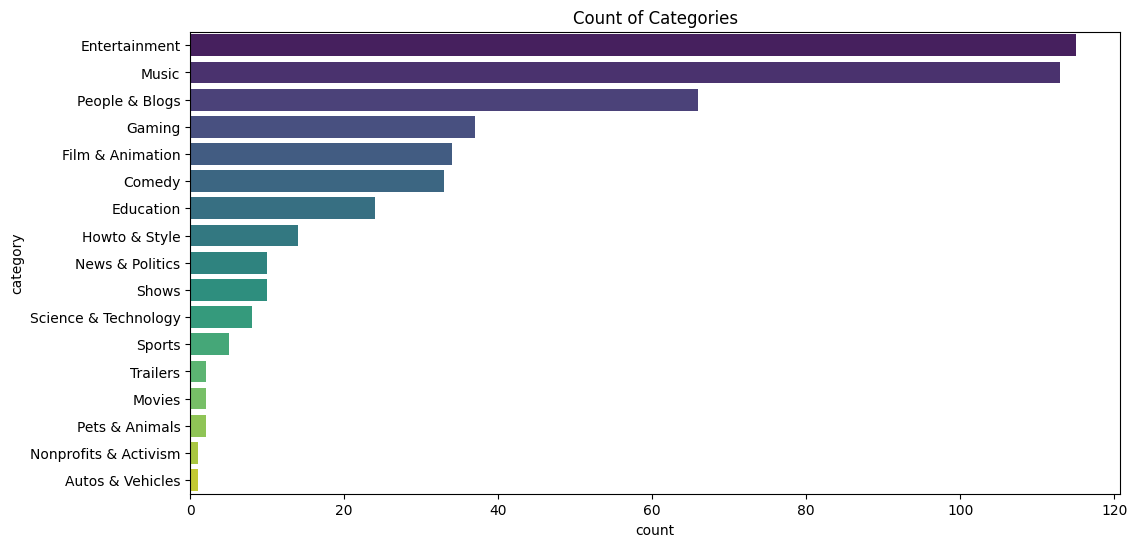

In [9]:
if 'category' in df.columns:
    plt.figure(figsize=(12, 6))
    sns.countplot(data=df, y='category', order=df['category'].value_counts().index, palette='viridis')
    plt.title("Count of Categories")
    plt.show()


## Bivariate Analysis: Subscribers vs Video Views

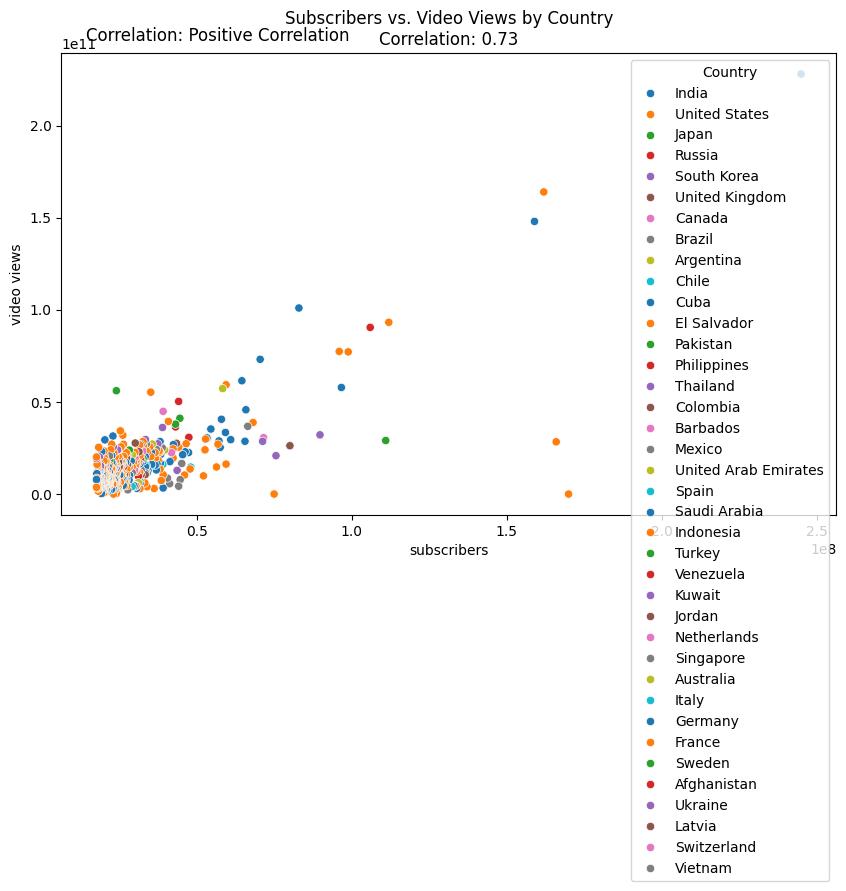

In [10]:
if 'subscribers' in df.columns and 'video views' in df.columns:
    plt.figure(figsize=(10, 6))
    correlation = df['subscribers'].corr(df['video views'])
    
    scatter = sns.scatterplot(data=df, x='subscribers', y='video views', hue='Country', palette='tab10')
    plt.title(f"Subscribers vs. Video Views by Country\nCorrelation: {correlation:.2f}")
    
    if correlation > 0:
        correlation_text = "Positive Correlation"
    elif correlation < 0:
        correlation_text = "Negative Correlation"
    else:
        correlation_text = "No Correlation"
    
    plt.figtext(0.15, 0.9, f"Correlation: {correlation_text}", fontsize=12, ha='left')
    plt.show()


## Pair Plot of Numerical Features

C:\Users\HP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
C:\Users\HP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
C:\Users\HP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
C:\Users\HP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `pa

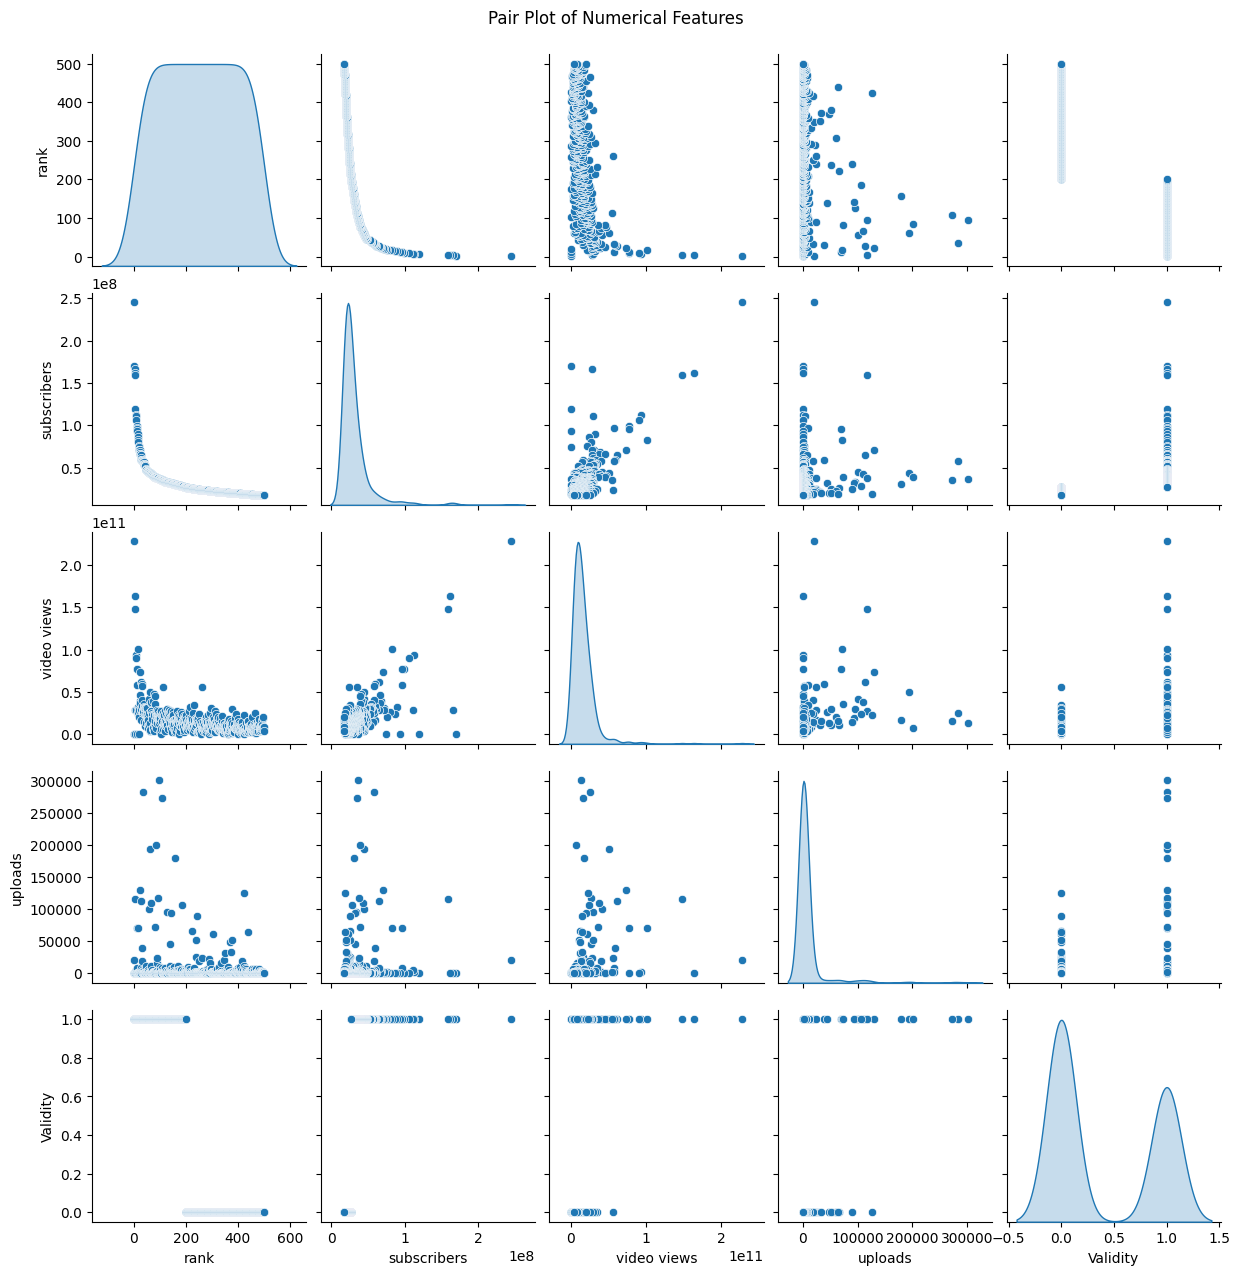

In [11]:
sns.pairplot(df[num_cols], diag_kind="kde", palette="husl")
plt.suptitle("Pair Plot of Numerical Features", y=1.02)
plt.show()


## Bar Plot: Average Subscribers by Category

C:\Users\HP\AppData\Local\Temp\ipykernel_4396\2498956574.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='category', y='subscribers', estimator=np.mean, ci=None, palette='viridis')
C:\Users\HP\AppData\Local\Temp\ipykernel_4396\2498956574.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='category', y='subscribers', estimator=np.mean, ci=None, palette='viridis')


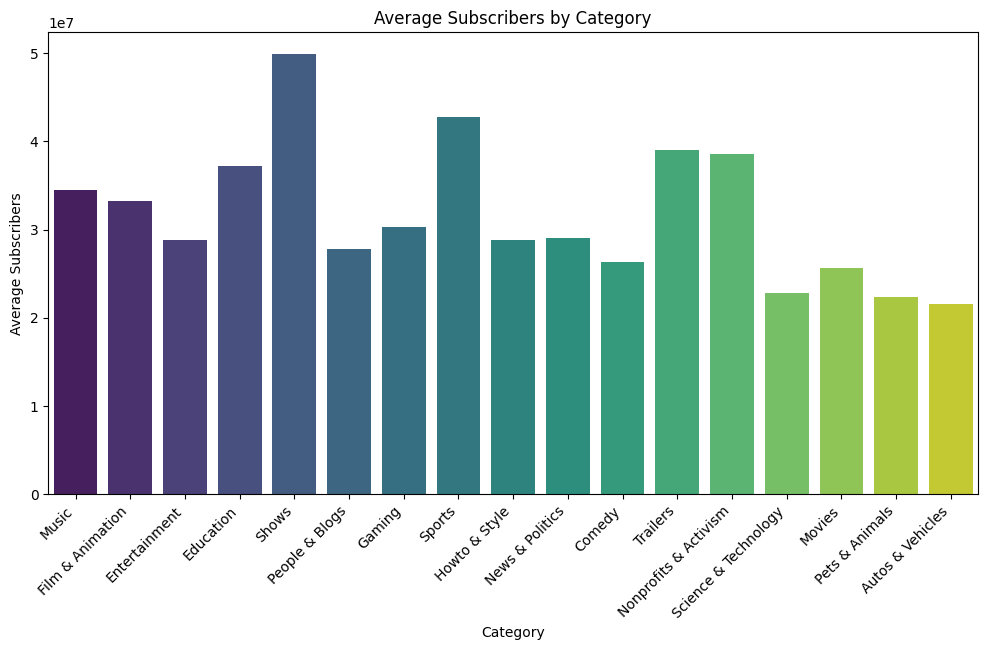

In [12]:
if 'category' in df.columns and 'subscribers' in df.columns:
    plt.figure(figsize=(12, 6))
    sns.barplot(data=df, x='category', y='subscribers', estimator=np.mean, ci=None, palette='viridis')
    plt.xticks(rotation=45, ha='right')
    plt.title("Average Subscribers by Category")
    plt.ylabel("Average Subscribers")
    plt.xlabel("Category")
    plt.show()


## Bar Plot: Total Video Views by Top Countries

C:\Users\HP\AppData\Local\Temp\ipykernel_4396\1722752325.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=filtered_df, x='Country', y='video views', estimator=np.sum, ci=None, palette='tab10')
C:\Users\HP\AppData\Local\Temp\ipykernel_4396\1722752325.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=filtered_df, x='Country', y='video views', estimator=np.sum, ci=None, palette='tab10')


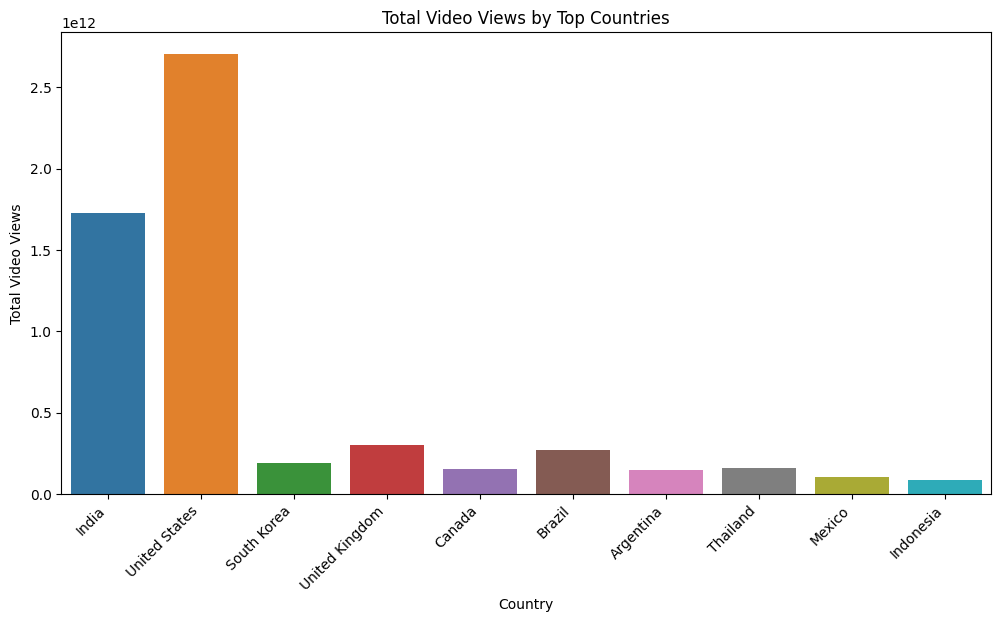

In [13]:
if 'Country' in df.columns and 'video views' in df.columns:
    top_countries = df['Country'].value_counts().nlargest(10).index
    filtered_df = df[df['Country'].isin(top_countries)]
    plt.figure(figsize=(12, 6))
    sns.barplot(data=filtered_df, x='Country', y='video views', estimator=np.sum, ci=None, palette='tab10')
    plt.title("Total Video Views by Top Countries")
    plt.ylabel("Total Video Views")
    plt.xlabel("Country")
    plt.xticks(rotation=45, ha='right')
    plt.show()


## Multivariate Analysis: Correlation Matrix

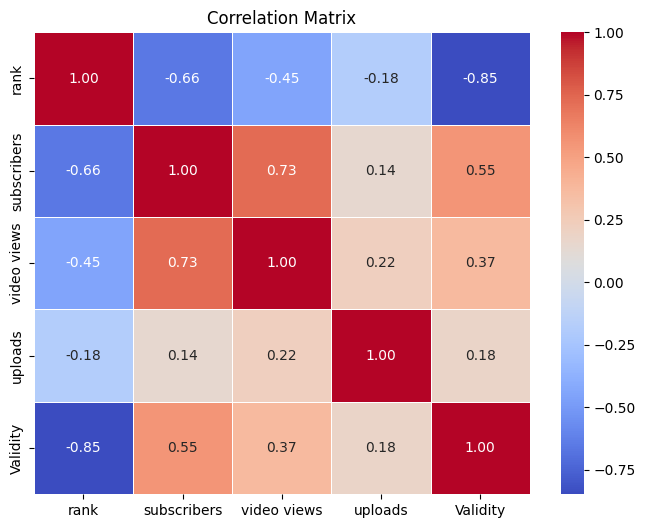

In [14]:
plt.figure(figsize=(8, 6))
sns.heatmap(df[num_cols].corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()
